In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#load the data
df = pd.read_csv('/content/sales_data.csv')
df.head()

,Date,Sales
0,2013-01-01,48.40
1,2013-01-02,49.63
2,2013-01-03,44.66
3,2013-01-04,56.70
4,2013-01-05,62.87


In [3]:
# Check data types
print(df.dtypes)

# Summary stati stics
print(df.describe())

Date      object
Sales    float64
dtype: object
             Sales
count  3653.000000
mean     75.139261
std      20.656918
min      18.800000
25%      59.930000
50%      75.240000
75%      89.780000
max     127.060000


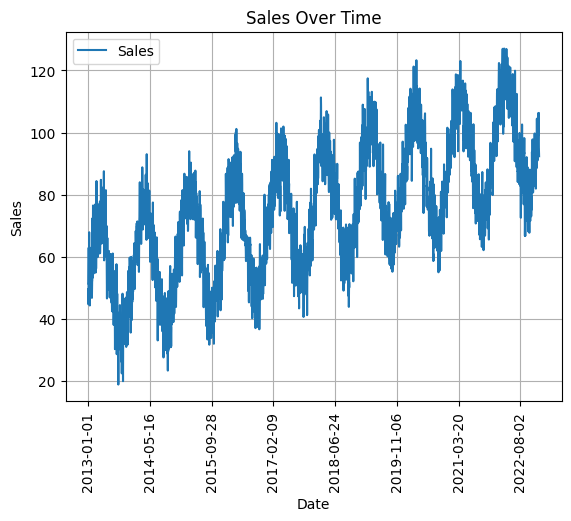

In [4]:
#Sales data plot
df.set_index('Date').plot()
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [5]:
# Splitting the data into training and validation sets
split_time = int(0.8 * len(df))
time = np.arange(len(df))
x_train = df['Sales'][:split_time]
x_valid = df['Sales'][split_time:]
time_valid = time[split_time:]

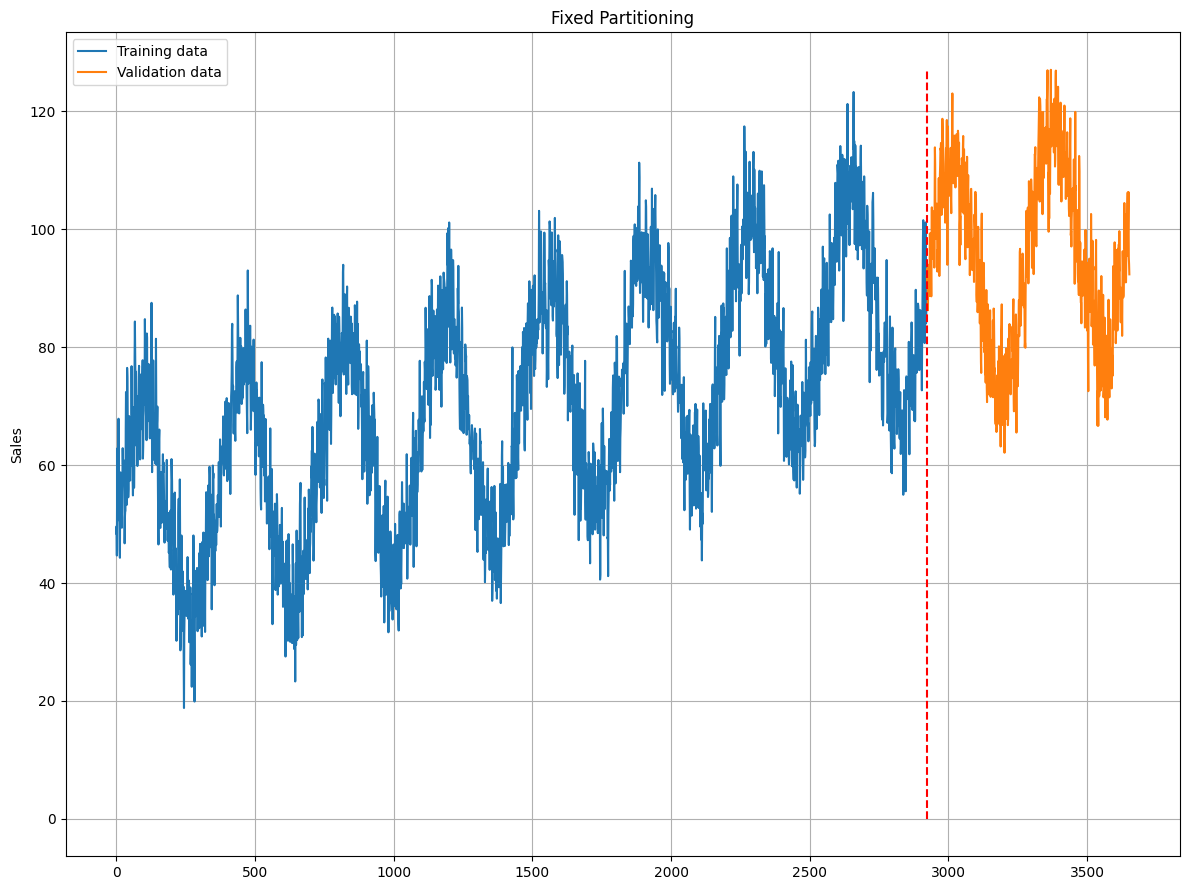

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))
# Plot training and validation data
ax.plot(df.index[:split_time], x_train, label='Training data')
ax.plot(df.index[split_time:], x_valid, label='Validation data')
# Add vertical split line
ax.vlines(df.index[split_time], ymin=0, ymax=df['Sales'].max(), colors='r', linestyles='--')
ax.set_ylabel('Sales')
ax.set_title('Fixed Partitioning')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
def plot_forecast(time, x_valid, forecast, title, start_index=None, end_index=None):
    plt.figure(figsize=(10, 6))
    plt.plot(time, x_valid, label="True Values")
    plt.plot(time, forecast, label=title)

    if start_index and end_index:
        tick_frequency = (end_index - start_index) // 10
        tick_indices = list(range(start_index, end_index, tick_frequency))
        tick_labels = [df['Date'].iloc[i] for i in tick_indices]
        plt.xticks(tick_indices, tick_labels, rotation=90)
        plt.xlim(start_index, end_index)

    plt.title(f"Validation Split: True Values vs {title}")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_errors(y_true, y_pred):
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    return mse, mae

#Naive forecasting

In [8]:
# Naive forecast
df['Naive_Forecast'] = df['Sales'].shift(1)
df.head()


,Date,Sales,Naive_Forecast
0,2013-01-01,48.40,NaN
1,2013-01-02,49.63,48.40
2,2013-01-03,44.66,49.63
3,2013-01-04,56.70,44.66
4,2013-01-05,62.87,56.70


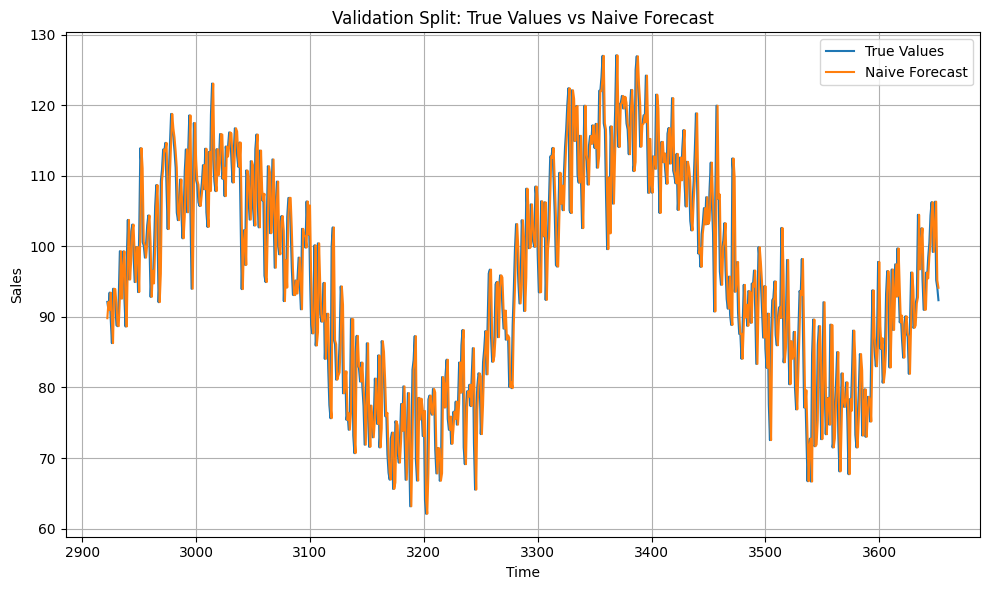

In [9]:
plot_forecast(time_valid, x_valid, df['Naive_Forecast'][split_time:], "Naive Forecast")

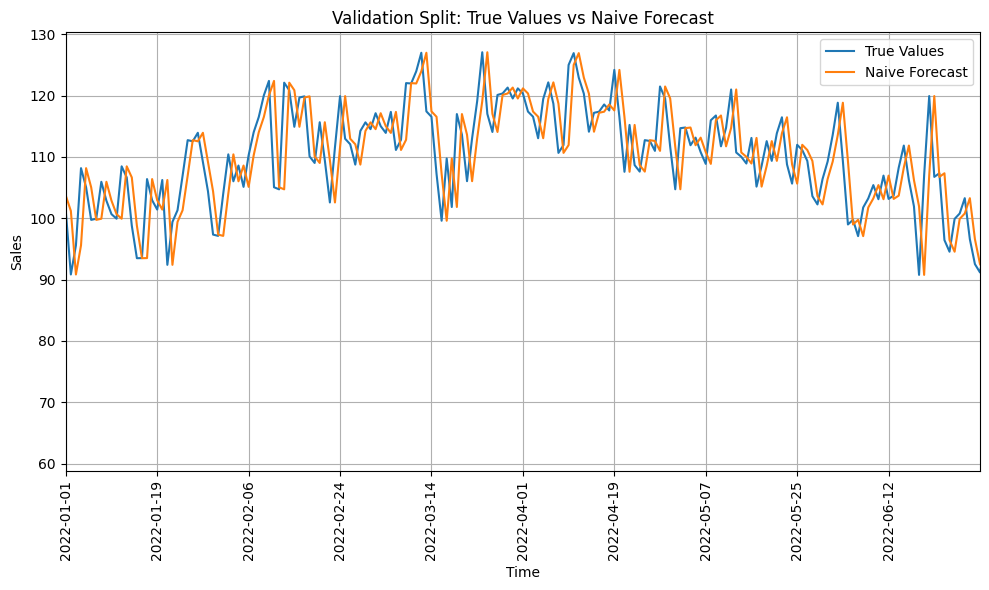

In [10]:
# Zoomed in Plot
start_date = "2022-01-01"
end_date = "2022-06-30"
start_index = df[df["Date"] == start_date].index[0]
end_index = df[df["Date"] == end_date].index[0]
plot_forecast(time_valid, x_valid, df['Naive_Forecast'][split_time:], "Naive Forecast", start_index, end_index)

In [11]:
calculate_errors(x_valid, df['Naive_Forecast'][split_time:])

Mean Squared Error: 38.193970588235295
Mean Absolute Error: 4.874322845417238


(38.193970588235295, 4.874322845417238)

#Moving Average

In [12]:
def moving_average_forecast(df, window):
    return df['Sales'].rolling(window=window).mean().shift(1)

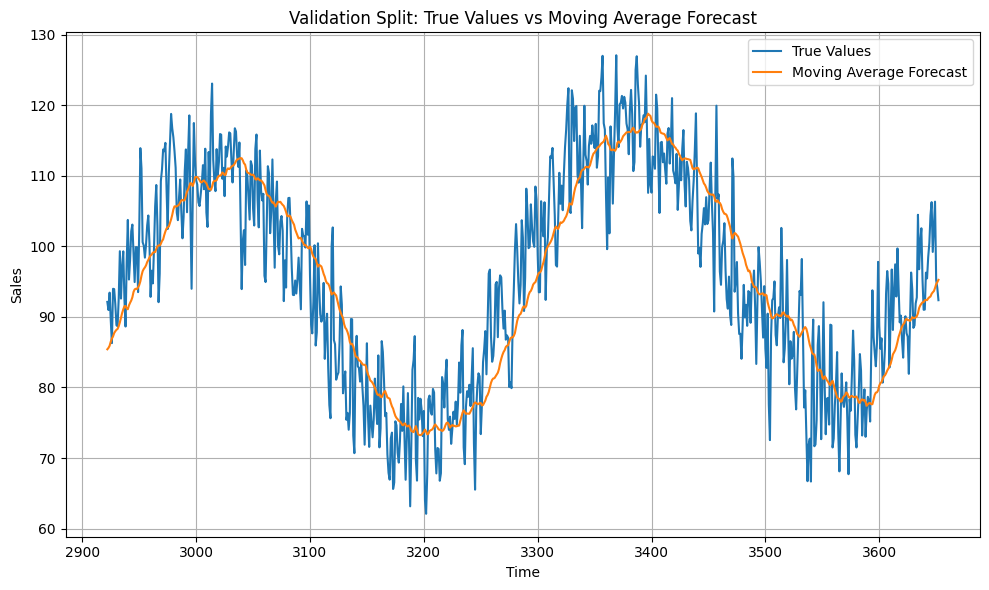

Mean Squared Error: 50.395313873841005
Mean Absolute Error: 5.6977409940720465


(50.395313873841005, 5.6977409940720465)

In [13]:
# Moving Average Forecast for 30 days
df['Moving_Average_Forecast'] = moving_average_forecast(df, 30)
plot_forecast(time_valid, x_valid, df['Moving_Average_Forecast'][split_time:], "Moving Average Forecast")
calculate_errors(x_valid, df['Moving_Average_Forecast'][split_time:])

In [14]:
# Moving Average Forecast - 7 days
df['Moving_Average_Forecast_7'] = moving_average_forecast(df, 7)
calculate_errors(x_valid, df['Moving_Average_Forecast_7'][split_time:])


Mean Squared Error: 39.80341847343589
Mean Absolute Error: 5.027627516122728


(39.80341847343589, 5.027627516122728)